### 概述

人工智能是一个广泛的领域，研究如何让机器或计算机系统表现出类似人类的智能行为。传统的AI方法包括：基于规则、逻辑推理、专家系统等，甚至基于 If-else 的决策系统也可以称为AI系统。而机器学习则是AI中的一个子方法。进一步来说，现在流行的神经网络/深度学习等也是机器学习中的一个子方法。

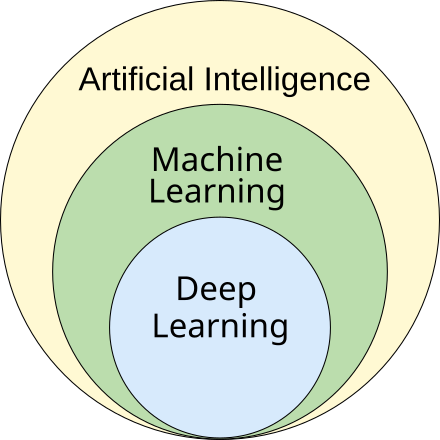

机器学习（Machine Learning）是人工智能（Artificial Intelligence, AI）的一个重要分支，它通过让计算机从数据中学习规律，从而实现对未知数据的预测或决策。与传统的编程方法不同，机器学习不需要明确地编写规则，而是通过算法分析和处理大量数据，自动构建模型，从中提取特征和模式。

机器学习可以分为三大类：监督学习、无监督学习和强化学习。监督学习需要提供带有标签的数据集，模型通过学习输入与输出之间的关系进行预测，例如图像分类和语音识别。无监督学习则用于分析和挖掘数据中的隐藏结构，常见应用包括聚类分析和降维。强化学习通过试错的方式，利用奖励机制来训练智能体完成特定任务，如游戏中的自动决策算法。

在实际应用中，机器学习已广泛应用于许多领域，例如推荐系统、自然语言处理、自动驾驶、医疗诊断和金融风险评估等。随着数据量的增长和计算能力的提升，机器学习正在不断推动技术创新，改变我们的生活方式。

### 监督学习（Supervised Learning）

监督学习是一种通过学习已标注的数据（输入-输出对）来进行预测的机器学习方法。模型以一组输入（特征）和对应的输出（标签）为训练数据，通过学习输入与输出之间的映射关系，能够在遇到新数据时进行预测。

#### 特点：
- **数据特点**：训练数据是带有标签的，也就是说，每个输入样本都对应一个明确的输出。
- **目标**：找到输入特征和输出之间的映射关系，最小化预测值与真实值之间的误差。
- **常见算法**：
  - **回归**（Regression）：用于预测连续值，例如线性回归、支持向量回归（SVR）。
  - **分类**（Classification）：用于预测离散类别，例如逻辑回归、支持向量机（SVM）、决策树、随机森林、神经网络。

#### 应用场景：
- **图像分类**：识别一张图片是猫还是狗。
- **语音识别**：将语音转换为文字。
- **股票价格预测**：根据历史数据预测股票的未来价格。
- **垃圾邮件检测**：判断一封邮件是垃圾邮件还是正常邮件。

测试集真实值: [150 200]
测试集预测值: [136.75799087 188.35616438]
均方误差 (MSE): 155.46485686286468


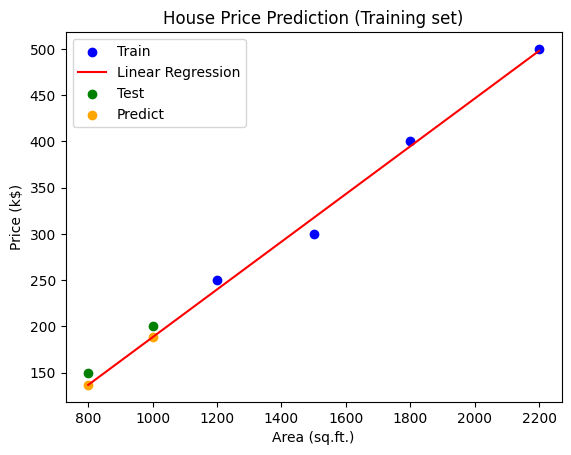

In [ ]:
# 导入库
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# 示例数据（房屋面积和价格）
# 面积 (平方英尺)
X = np.array([[800], [1000], [1200], [1500], [1800], [2200]])
# 房价 (单位：千美元)
y = np.array([150, 200, 250, 300, 400, 500])

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建线性回归模型并训练
model = LinearRegression()
model.fit(X_train, y_train)

# 进行预测
y_pred = model.predict(X_test)

# 输出结果
print("测试集真实值:", y_test)
print("测试集预测值:", y_pred)
print("均方误差 (MSE):", mean_squared_error(y_test, y_pred))

import matplotlib.pyplot as plt

# 绘制训练集数据
plt.scatter(X_train, y_train, color='blue', label='Train')
# 绘制拟合直线
plt.plot(X, model.predict(X), color='red', label='Linear Regression')
plt.scatter(X_test, y_test, color='green', label='Test')
plt.scatter(X_test, y_pred, color='orange', label='Predict')
plt.legend()
plt.title('House Price Prediction (Training set)')
plt.xlabel('Area (sq.ft.)')
plt.ylabel('Price (k$)')
plt.show()

### 无监督学习（Unsupervised Learning）

无监督学习是一种在没有标签的情况下，通过分析数据的内在结构来学习模式和规律的机器学习方法。模型不需要明确的输入-输出对，而是通过数据本身的分布特征来发现隐藏的规律。

#### 特点：
- **数据特点**：数据没有标签，仅有输入特征。
- **目标**：挖掘数据的内在结构或关系，例如分类、分组或降维。
- **常见算法**：
  - **聚类（Clustering）**：将数据分为多个组，例如K均值（K-Means）、层次聚类（Hierarchical Clustering）。
  - **降维（Dimensionality Reduction）**：将高维数据映射到低维空间，例如主成分分析（PCA）、t-SNE。
  - **密度估计**：估计数据的分布，例如高斯混合模型（GMM）。

#### 应用场景：
- **客户分群**：根据客户的行为数据将其分为不同组，用于精准营销。
- **异常检测**：发现数据中与大多数样本显著不同的异常点，例如信用卡欺诈检测。
- **推荐系统**：通过用户行为数据发现潜在的兴趣（如协同过滤）。
- **图像降维**：将高分辨率图像压缩到更低维度以进行存储或分析。

In [8]:
# 导入库
from sklearn.cluster import KMeans
import numpy as np
import os 

os.environ["LOKY_MAX_CPU_COUNT"] = "4"

# 生成示例数据（客户购买行为：总购买额、购买频率）
X = np.array([[200, 30], [150, 20], [300, 40], [1000, 100], [1200, 110], [400, 50]])

# 创建 K-Means 聚类模型
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# 获取聚类结果
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# 输出结果
print("客户分群标签:", labels)
print("聚类中心:", centers)

客户分群标签: [0 0 0 1 1 0]
聚类中心: [[ 262.5   35. ]
 [1100.   105. ]]



### 强化学习（Reinforcement Learning）

强化学习是一种通过智能体（Agent）与环境（Environment）交互来学习策略的机器学习方法。智能体通过试探性行动，观察环境的反馈（奖励或惩罚），逐步学习如何在环境中采取最优行动以获得最大化的长期收益。

#### 特点：
- **数据特点**：强化学习没有明确的训练数据，智能体通过与环境的交互，逐步积累经验。
- **目标**：找到能够最大化累计奖励的策略（Policy）。
- **关键要素**：
  - **状态（State）**：智能体在环境中的当前状态。
  - **动作（Action）**：智能体在当前状态下可以采取的行为。
  - **奖励（Reward）**：环境对智能体采取某行动的反馈信号。
  - **策略（Policy）**：智能体根据状态选择动作的规则。
  - **价值函数（Value Function）**：评估某一状态或动作的长期收益。

#### 常见算法：
- **基于价值的算法**：Q学习、深度Q网络（DQN）。
- **基于策略的算法**：策略梯度（Policy Gradient）、演员-评论家（Actor-Critic）。
- **模型自由算法**：直接学习最优策略或价值函数。
- **模型基算法**：通过学习环境的动态模型进行规划。

#### 应用场景：
- **游戏AI**：AlphaGo通过强化学习击败人类顶级围棋选手。
- **自动驾驶**：优化汽车的驾驶行为，例如避开障碍物和选择最佳路径。
- **机器人控制**：通过学习，机器人能够完成复杂任务，如行走、抓取物体。
- **动态资源分配**：在数据中心实现能耗优化。

In [9]:
# 导入库
import gym
import numpy as np

if not hasattr(np, "bool8"):
    np.bool8 = np.bool_

# 创建环境
env = gym.make("CartPole-v1", render_mode="human")

# 初始化环境
state = env.reset()
done = False
steps = 0

# 简单的随机策略示例
while not done:
    # 渲染环境
    env.render()

    # 随机选择一个动作 (0 或 1)
    action = env.action_space.sample()

    # 执行动作，获取新状态和奖励
    state, reward, done, truncated , info = env.step(action)
    steps += 1

print(f"游戏结束，总步数: {steps}")
env.close()

游戏结束，总步数: 11


### 三者对比

| 特点                | 监督学习                      | 无监督学习                  | 强化学习                  |
|---------------------|------------------------------|----------------------------|--------------------------|
| **数据需求**        | 需要带标签的数据             | 不需要标签，仅需输入数据   | 不需要标签，通过交互获取奖励 |
| **目标**            | 预测或分类                  | 探索数据内在结构           | 最大化累计奖励             |
| **应用对象**        | 静态数据                    | 静态数据                   | 动态环境                  |
| **常见方法**        | 回归、分类                  | 聚类、降维                 | 策略优化、Q学习           |
| **应用场景**        | 图像识别、预测任务          | 客户分群、异常检测         | 游戏AI、机器人控制         |

这三种学习方法分别适用于不同类型的问题和场景，构成了机器学习的重要基础。